# 池化操作（Pooling)
不同于卷积层中的输入与卷积核之间的互相关计算，汇聚层不包含参数。 相反，池运算是确定性的，我们通常计算汇聚窗口中所有元素的最大值或平均值。这些操作分别称为最大汇聚层（maximum pooling）和平均汇聚层（average pooling）。与卷积层一样，汇聚层也可以改变输出形状。和以前一样，我们可以通过填充和步幅以获得所需的输出形状。 

In [1]:
import torch
from torch import nn
# 不考虑padding和stride
def pool2d(X, pool_size, mode="max"):
    m, n = X.shape
    out = torch.zeros(m-pool_size[0]+1, n-pool_size[1]+1)
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            X_ij = X[i:i+pool_size[0], j:j+pool_size[1]]
            if mode == "max":
                out[i, j] = X_ij.max()
            if mode == "avg":
                out[i, j] = X_ij.mean()
    return out
X = torch.arange(9.0).reshape(3, 3)
omax = pool2d(X, (2, 2), "max")
oavg = pool2d(X, (2, 2), "avg")
X, omax, oavg

(tensor([[0., 1., 2.],
         [3., 4., 5.],
         [6., 7., 8.]]),
 tensor([[4., 5.],
         [7., 8.]]),
 tensor([[2., 3.],
         [5., 6.]]))

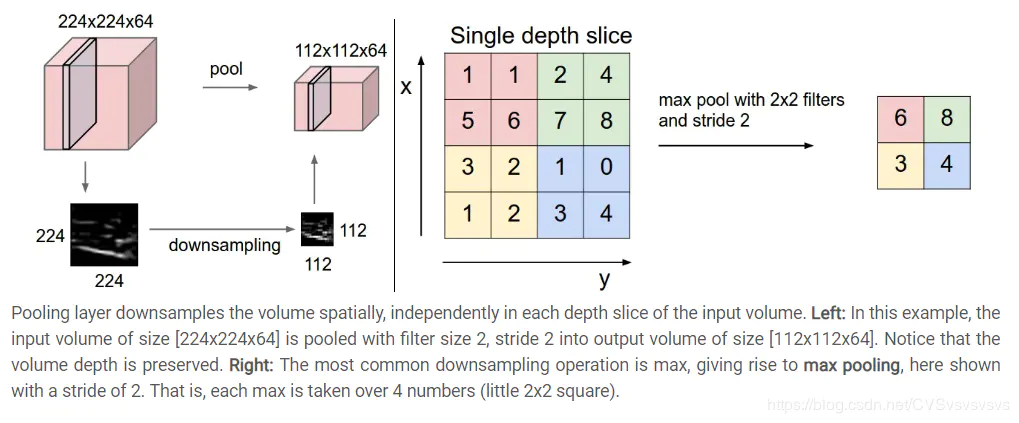
[如图，使用了pool操作其实就是降低图片的空间尺寸。](https://www.jianshu.com/p/4b1cb31eaf23)    
**为什么可以降低图片空间尺寸呢？**  
**为什么要降低图片的空间尺寸呢？**  
这两个问题，其实是触及了池化技术的本质：在尽可能保留图片空间信息的前提下，降低图片的尺寸，增大卷积核感受野，提取高层特征，同时减少网络参数量，预防过拟合。

但我们在做卷积的时候，让conv 层的步长stride = 2同样也可以起到降低尺寸的目的啊，为什么需要pooling 层来降低尺寸，这就回到了上文的：池化层不需要保留参数。它采用一个固定的函数进行像素运算，如max pooling filter中采用了max函数，是不需要保留参数的，所以减少了网络的参数量。


## 使用内置池化层演示Padding和Stride
[【科研利器】Zotero 配合 ipad，读文献效率翻倍！](https://blog.csdn.net/xiangduixuexi/article/details/120930192)
nn.MaxPool2d(  
    kernel_size: Union[int, Tuple[int, ...]],  
    stride: Union[int, Tuple[int, ...], NoneType] = None,  
    padding: Union[int, Tuple[int, ...]] = 0,  
    dilation: Union[int, Tuple[int, ...]] = 1,  
    return_indices: bool = False,  
    ceil_mode: bool = False,  
) -> None  

In [2]:
# 样本数为1, 通道数为1
X = torch.arange(16.0).reshape(1, 1, 4, 4)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [11]:
cov = nn.MaxPool2d(2, stride=2)
cov(X) # 1, 1, 2, 2

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [12]:
cov2 = nn.MaxPool2d((3, 3), padding=1)
cov2(X), cov2.state_dict()

(tensor([[[[ 5.,  7.],
           [13., 15.]]]]),
 OrderedDict())